In [1]:
import altair as alt
from altair import Chart, X, Y, Color, Scale, Axis
import pandas as pd

import gif

In [2]:
df = pd.read_csv('textbooks.csv')
df['read'] = pd.to_datetime(df['read'])
df['language'] = df['language'].apply(lambda x: x if x in ['Swift', 'R', 'Python'] else 'Other')

In [3]:
@gif.frame
def plot(date):
    x_start = date - pd.Timedelta('2000 days')
    x_end = date + pd.Timedelta('1 day')
    d = df[df['read'] <= date]
    date_ticks = pd.date_range(x_start, x_end, freq='YS').tolist()
    
    chart = Chart(d).encode(
        x=X('read', 
            title=None, 
            scale=Scale(domain=(x_start, x_end)), 
            axis=Axis(format="%Y", values=date_ticks)
        ),
        y=Y('pages', title=None, scale=Scale(domain=(0, 1200))), 
        color=Color('language', legend=None, scale=Scale(
            domain=['Swift', 'R', 'Python', 'Other'], 
            range=['#fd9426', '#5fc9f8', '#fecb2e', "#8e8e93"]
        ))).mark_circle(size=150).properties(width=500, height=300)
    
    return chart

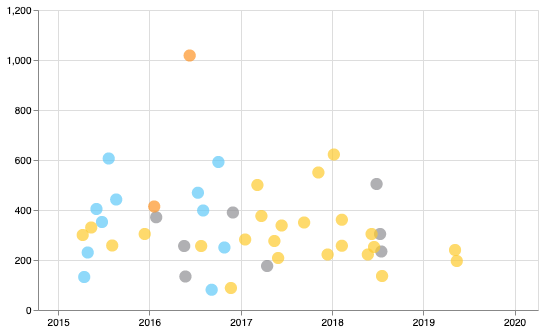

In [4]:
plot(pd.Timestamp('2020-04-03'))

In [ ]:
dates = pd.date_range(
    start=df['read'].min() - pd.Timedelta('50 days'),
    end=pd.Timestamp('now') + pd.Timedelta('50 days'),
    freq='4D'
)

frames = []
for date in dates:
    frame = plot(date)
    frames.append(frame)

gif.save(frames, 'textbooks.gif', duration=40)

/Users/max/anaconda3/lib/python3.7/site-packages/altair/utils/core.py:187: UserWarning: I don't know how to infer vegalite type from 'empty'.  Defaulting to nominal.
  "Defaulting to nominal.".format(typ)
/Users/max/anaconda3/lib/python3.7/site-packages/altair/utils/core.py:187: UserWarning: I don't know how to infer vegalite type from 'empty'.  Defaulting to nominal.
  "Defaulting to nominal.".format(typ)
/Users/max/anaconda3/lib/python3.7/site-packages/altair/utils/core.py:187: UserWarning: I don't know how to infer vegalite type from 'empty'.  Defaulting to nominal.
  "Defaulting to nominal.".format(typ)
/Users/max/anaconda3/lib/python3.7/site-packages/altair/utils/core.py:187: UserWarning: I don't know how to infer vegalite type from 'empty'.  Defaulting to nominal.
  "Defaulting to nominal.".format(typ)
/Users/max/anaconda3/lib/python3.7/site-packages/altair/utils/core.py:187: UserWarning: I don't know how to infer vegalite type from 'empty'.  Defaulting to nominal.
  "Defaulting 